In [114]:
%load_ext autoreload 
%autoreload 2

import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt

import model as md
import view as vw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
F_main_real=444e3
duration = 10/F_main_real
fs = F_main_real*4

F_noise_1=100e3
F_noise_2=700e3
F_noise_3=200e3
F_noise_4=2e6

phase_real=160

t = np.linspace(0, duration, int(duration * fs))  

U = md.generate_sin(t,F_main_real,2)+md.generate_sin(t,F_noise_1)+md.generate_sin(t,F_noise_2)+md.generate_sin(t,F_noise_3)+md.generate_sin(t,F_noise_4,1,phase_real)
I=md.generate_sin(t,F_main_real,2,phase_real)+md.generate_sin(t,F_noise_1)+md.generate_sin(t,F_noise_2)+md.generate_sin(t,F_noise_3)+md.generate_sin(t,F_noise_4,1,phase_real)

U = md.generate_sin(t,F_main_real,2)
I=md.generate_sin(t,F_main_real,2,phase_real)

phase_real_graph= np.full(len(t), phase_real)

4


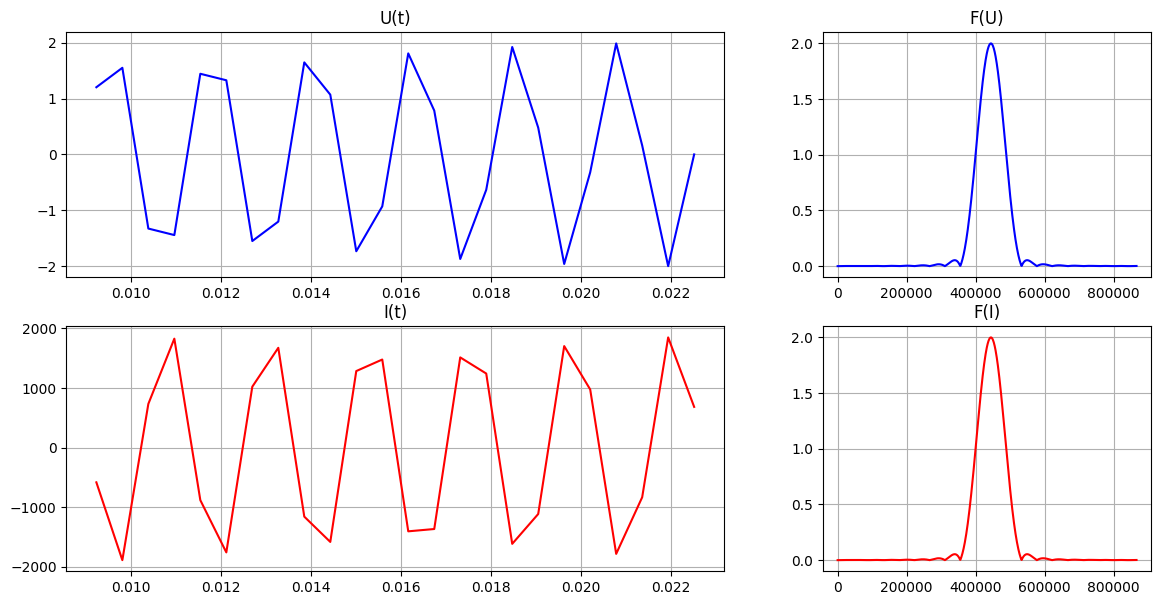

In [131]:
F,V = md.get_spectrum3(t,U)

F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc
T_counts=md.convert_to_counts(t,T)
print(T_counts)
window=T_counts*4

vw.show_I_U_2(t,I,U,window)

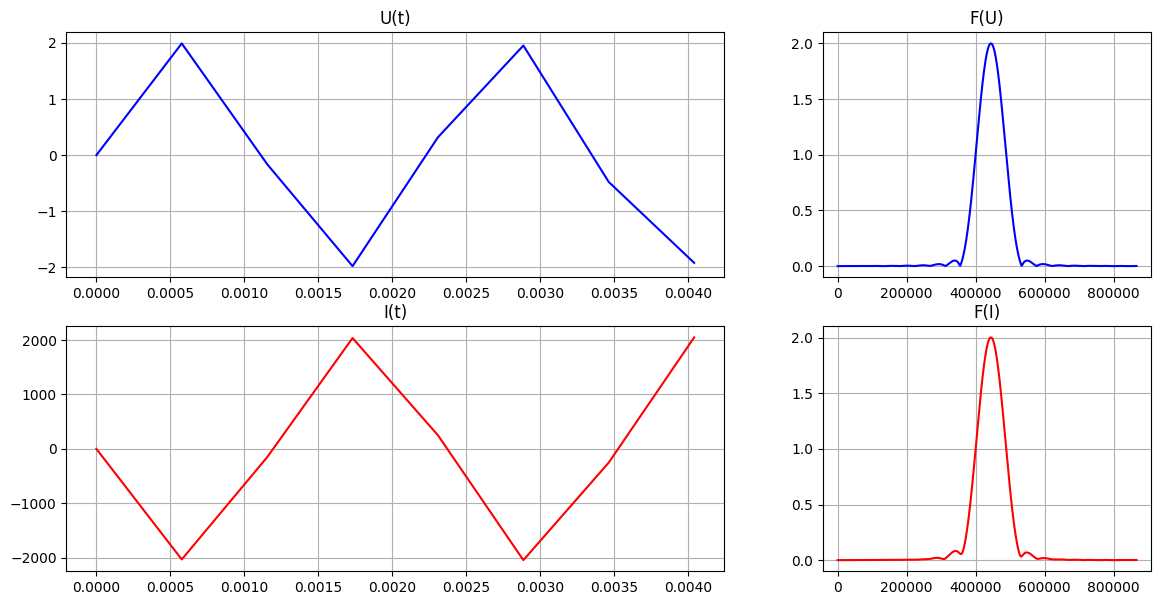

In [117]:
t_f, U_f=md.filter_butter_bandpass(t,U,F_peak_calc,100e3,5)
t_f, I_f=md.filter_butter_bandpass(t,I,F_peak_calc,100e3,5)

vw.show_I_U_2(t_f,I_f, U_f,0,window)

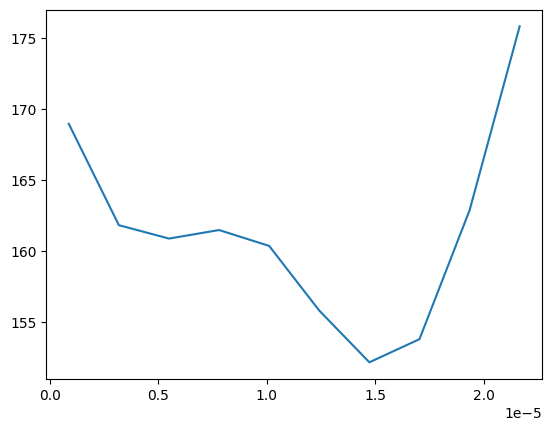

In [118]:
time_maxpoint,phase_maxpoint=md.get_phase_maxpoint(t_f,U_f,I_f,F_peak_calc)
plt.plot(time_maxpoint,phase_maxpoint)

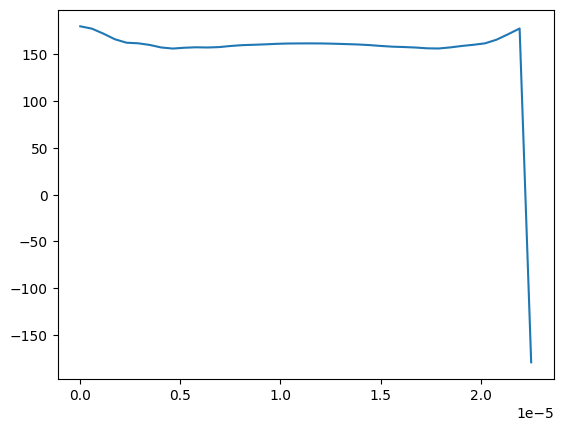

In [119]:
time_hilbert, phase_hilbert=md.get_phase_hilbert(t_f,U_f, I_f)
vw.plot(time_hilbert,phase_hilbert)

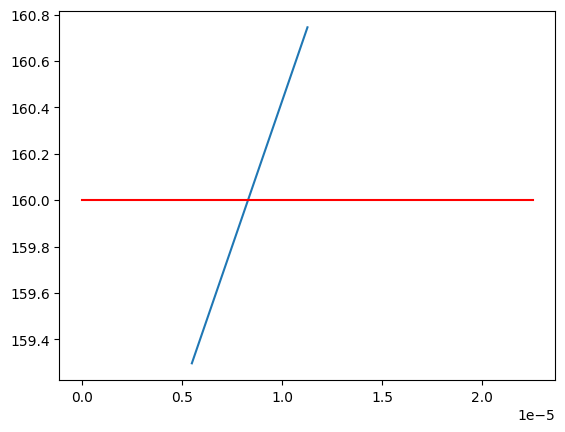

In [120]:
time_FFT, phase_FFT = md.get_phase_FFT(t_f,U_f, I_f, F_peak_calc, n_periods=20, overlap=0.5)
plt.plot(time_FFT, phase_FFT)
plt.plot(t,phase_real_graph,"red")

In [121]:
md.get_kde_mode(phase_FFT)

np.float64(160.02031186197237)

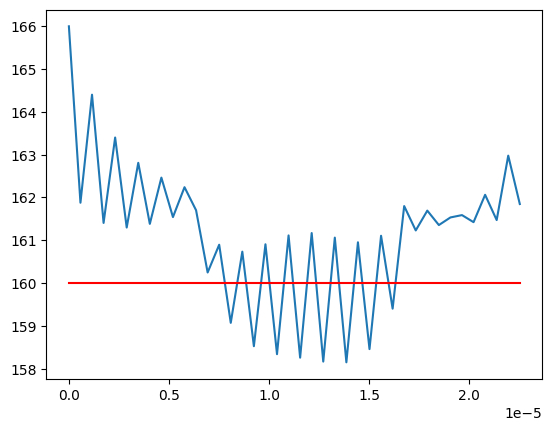

In [122]:
time_lockin, phase_lockin = md.get_phase_lockin(t_f,U_f, I_f,F_peak_calc,5)
plt.plot(time_lockin,phase_lockin)
plt.plot(t,phase_real_graph,"red")

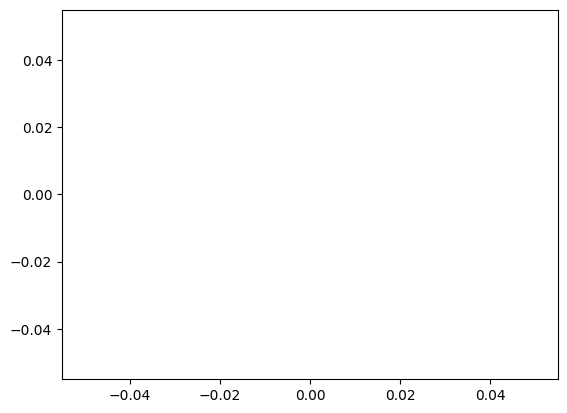

In [123]:
time_xcorr,phasse_xcorr = md.get_phase_xcorr2(t_f,U_f, I_f, F_peak_calc)
plt.plot(time_xcorr,phasse_xcorr)

In [124]:
md.print_full_stats(F_peak_calc, phase_maxpoint,phase_hilbert,phase_FFT,phase_lockin,phasse_xcorr)

Array 1: Mean phase = 161.3838, KDE mode phase = 160.3937
Array 1: Mean Frel = -1317897.2063, KDE mode Frel = -1246285.6339
Array 2: Mean phase = 153.3408, KDE mode phase = 161.6616
Array 2: Mean Frel = -884237.5139, KDE mode Frel = -1339328.2619
Array 3: Mean phase = 160.0210, KDE mode phase = 160.0203
Array 3: Mean Frel = -1221099.9607, KDE mode Frel = -1221051.8166
Array 4: Mean phase = 161.1516, KDE mode phase = 161.4416
Array 4: Mean Frel = -1300450.0448, KDE mode Frel = -1322308.0269


IndexError: index 0 is out of bounds for axis 0 with size 0